It rains approximately 62% of the time in ProbabilityLand.


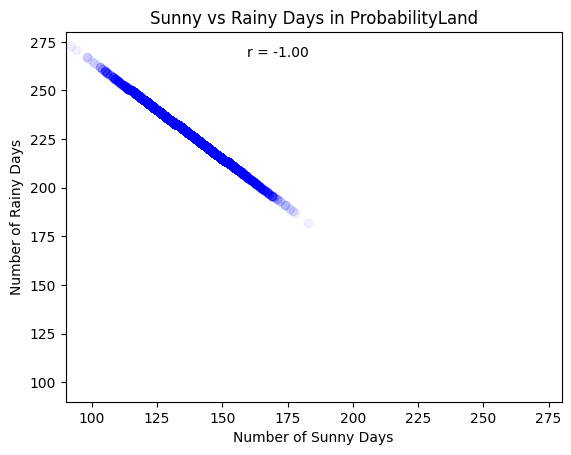

In [1]:
import numpy as np
import matplotlib.pyplot as plt
result = []
# repeat the simulation 10,000 times
for _ in range(10_000):
    sunnydays = 0
    # start with a forecast of sunny (1) with 70% probability
    forecast = np.random.binomial(1, .7, 1).item()
    # simulate the weather for 365 days
    for _ in range(365):
        if forecast == 1:
            # if the forecast is sunny, count it as a sunny day and update the forecast with 50% probability of being sunny
            sunnydays += 1
            forecast = np.random.binomial(1, .5, 1).item()
        else:
            # if the forecast is not sunny, update the forecast with 30% probability of being sunny
            forecast = np.random.binomial(1, .3, 1).item()
    result.append(sunnydays)
# calculate the percentage of days when it rains
pct_rain = ((365 - (sum(result) / len(result))) / 365)
print('It rains approximately ' + '{0:.0%}'.format(pct_rain) + ' of the time in ProbabilityLand.')
# calculate correlation coefficient
sunny_days = np.array(result)
rainy_days = 365 - sunny_days
corr = np.corrcoef(sunny_days, rainy_days)[0][1]
# create scatter plot
plt.xlim(90, 280)
plt.ylim(90, 280)
plt.scatter(sunny_days, rainy_days, color='blue', alpha=0.05)
plt.xlabel('Number of Sunny Days')
plt.ylabel('Number of Rainy Days')
plt.title('Sunny vs Rainy Days in ProbabilityLand')
# add correlation coefficient to plot
plt.text(x = np.max(sunny_days), y = np.max(rainy_days), 
         s = f"r = {corr:.2f}", ha = 'right', va = 'top')
plt.savefig('weather-probability-land-scatter.png', dpi=300, bbox_inches='tight')
plt.show()